In [70]:
	
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import datasets, metrics
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

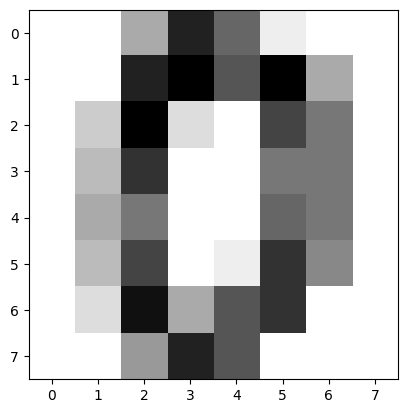

In [88]:
digits = datasets.load_digits()
X = digits.images  # (1797, 8, 8)
y = digits.target  # (1797,)

plt.imshow(X[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [96]:
X = X / 16.0  
X = X.reshape(-1, 64)  
y = to_categorical(y, num_classes=10)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(64,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)

loss, acc = model.evaluate(X_test, y_test)
print(f" Test Accuracy: {acc:.4f}")

Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2155 - loss: 2.2269 - val_accuracy: 0.3264 - val_loss: 1.9854
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.4784 - loss: 1.7567 - val_accuracy: 0.7153 - val_loss: 1.2368
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.7763 - loss: 0.9812 - val_accuracy: 0.8403 - val_loss: 0.6579
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.8635 - loss: 0.5566 - val_accuracy: 0.8958 - val_loss: 0.4055
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.9169 - loss: 0.3508 - val_accuracy: 0.9236 - val_loss: 0.3098
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.9307 - loss: 0.2834 - val_accuracy: 0.9236 - val_loss: 0.2767
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.9284 - loss: 0.2341 - val_accuracy: 0.9236 - val_loss: 0.2297
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.9503 - loss: 0.1913 - val_accuracy: 0.92

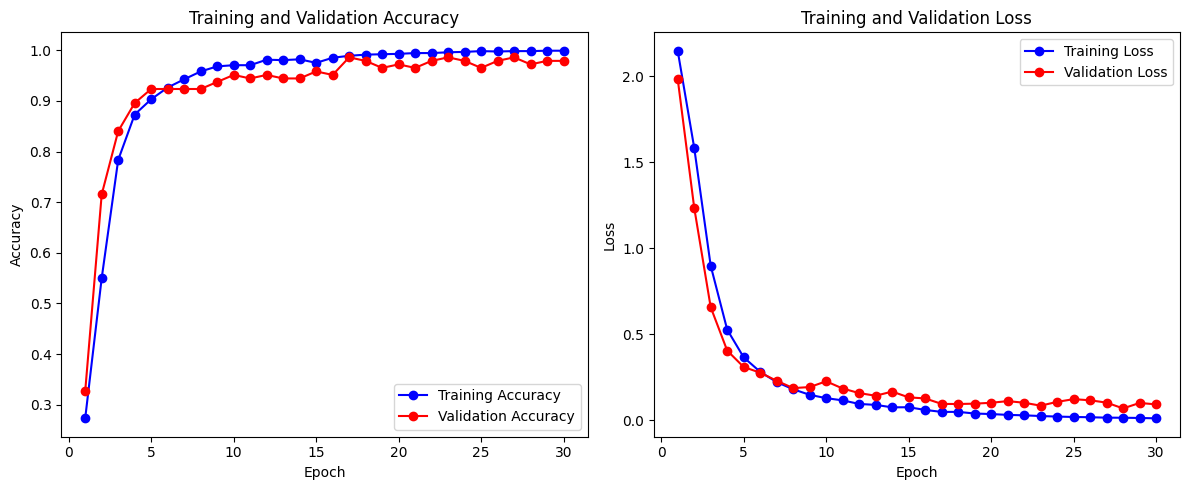

In [102]:
import matplotlib.pyplot as plt

# 에포크 정보 추출
epochs = range(1, len(history.history['accuracy']) + 1)

# 정확도 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 손실 시각화
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


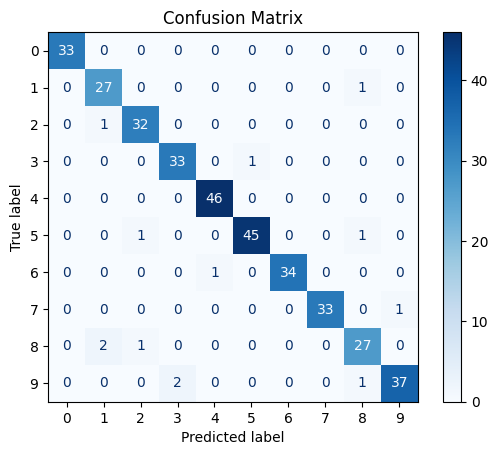

In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()